In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")

In [39]:
df = pd.read_csv(r'C:\Users\Mahmoud\Documents\archive\movies.csv')
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', None)
df = df.sort_values(by=['budget'], inplace=False, ascending=False)

## dropping duplicates


In [40]:
df.drop_duplicates()

name     rating      genre  year                                       released  score      votes                          director                            writer                         star                         country       budget         gross                                            company  runtime
7445                                  Avengers: Endgame      PG-13     Action  2019                 April 26, 2019 (United States)    8.4   903000.0                     Anthony Russo                Christopher Markus            Robert Downey Jr.                   United States  356000000.0  2.797501e+09                                     Marvel Studios    181.0
7244                             Avengers: Infinity War      PG-13     Action  2018                 April 27, 2018 (United States)    8.4   897000.0                     Anthony Russo                Christopher Markus            Robert Downey Jr.                   United States  321000000.0  2.048360e+09                                     Marvel Studios    149.0
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action  2017              December 15, 2017 (United States)    7.0   581000.0                      Rian Johnson                      Rian Johnson                 Daisy Ridley                   United States  317000000.0  1.332699e+09                               Walt Disney Pictures    152.0
7066                                     Justice League      PG-13     Action  2017              November 17, 2017 (United States)    6.1   418000.0                       Zack Snyder                      Jerry Siegel                  Ben Affleck                   United States  300000000.0  6.579270e+08                                       Warner Bros.    120.0
5060           Pirates of the Caribbean: at World's End      PG-13     Action  2007                   May 25, 2007 (United States)    7.1   608000.0                    Gore Verbinski                       Ted Elliott                  Johnny Depp                   United States  300000000.0  9.609965e+08                               Walt Disney Pictures    169.0
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action  2019              December 20, 2019 (United States)    6.5   394000.0                       J.J. Abrams                      Chris Terrio                 Daisy Ridley                   United States  275000000.0  1.078233e+09                               Walt Disney Pictures    141.0
7261                            Solo: A Star Wars Story      PG-13     Action  2018                   May 25, 2018 (United States)    6.9   306000.0                        Ron Howard                   Jonathan Kasdan             Alden Ehrenreich                   United States  275000000.0  3.929248e+08                                          Lucasfilm    135.0
4870                                   Superman Returns      PG-13     Action  2006                  June 28, 2006 (United States)    6.0   274000.0                      Bryan Singer                 Michael Dougherty                Brandon Routh                   United States  270000000.0  3.910812e+08                                       Warner Bros.    154.0
5658                                            Tangled         PG  Animation  2010              November 24, 2010 (United States)    7.7   417000.0                      Nathan Greno                      Dan Fogelman                  Mandy Moore                   United States  260000000.0  5.924628e+08                      Walt Disney Animation Studios    100.0
7480                                      The Lion King         PG  Animation  2019                  July 19, 2019 (United States)    6.9   222000.0                       Jon Favreau                    Jeff Nathanson                Donald Glover                   United States  260000000.0  1.670728e+09                               Walt Disney Pictures    118.0
5057                                

## Missing Data check and correction

In [41]:
for col in df.columns:
        df[col] = df[col].fillna(0, inplace=False)
        missing_pcnt = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, missing_pcnt), "\n")
        df[col] = df[col].fillna(0, inplace=False)

name - 0.0% 

rating - 0.0% 

genre - 0.0% 

year - 0.0% 

released - 0.0% 

score - 0.0% 

votes - 0.0% 

director - 0.0% 

writer - 0.0% 

star - 0.0% 

country - 0.0% 

budget - 0.0% 

gross - 0.0% 

company - 0.0% 

runtime - 0.0% 



In [42]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

## Scatter plot with Budget Vs Gross

Text(0, 0.5, 'Gross')

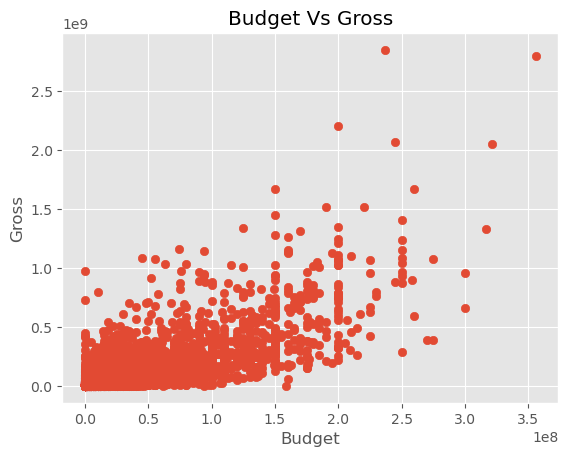

In [43]:
plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget Vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")

## plotting ..... with Seaborn

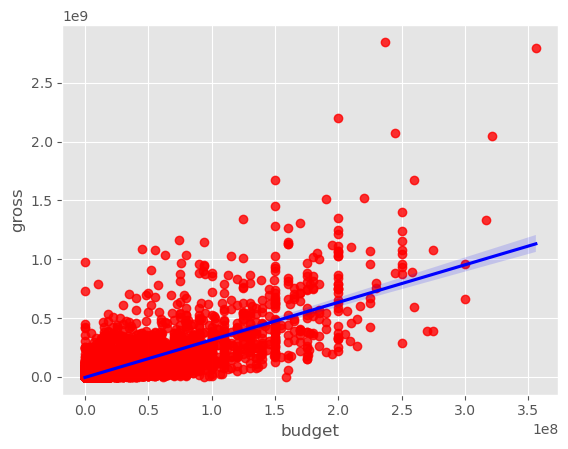

In [44]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.show()

## correlation matrix for Numeric Futures

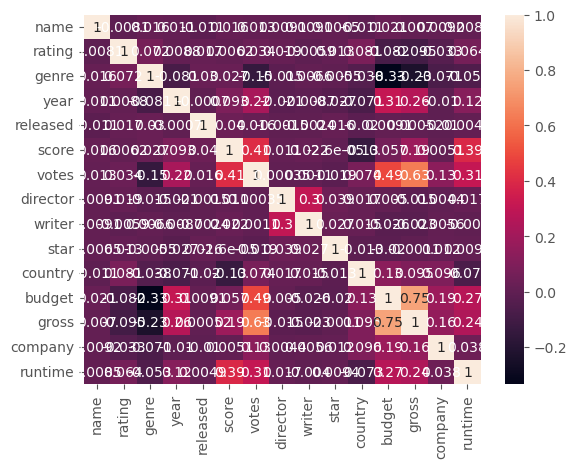

In [47]:
Data_corr = df.corr(method="pearson")
corr_matrix = sns.heatmap(Data_corr, annot=True)
plt.show()

# Numerizing all data

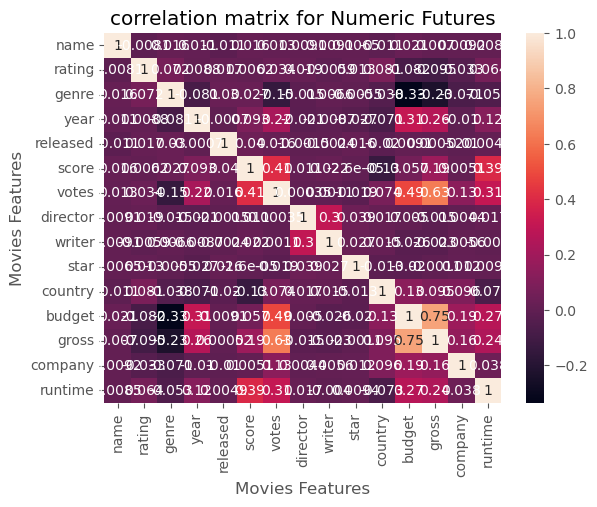

In [46]:

    df_num = df

    for name_col in df_num.columns:
        if df_num[name_col].dtype == "object":
            df_num[name_col] = df_num[name_col].astype("category")
            df_num[name_col] = df_num[name_col].cat.codes

    df_num = df.corr(method="pearson")
    corr_matrix = sns.heatmap(df_num, annot=True)
    plt.title("correlation matrix for Numeric Futures")
    plt.xlabel("Movies Features")
    plt.ylabel("Movies Features")
    plt.show()

    corr_pairs_sorted = df_num.unstack().sort_values()

    high_corr_sorted = corr_pairs_sorted[(corr_pairs_sorted > 0.5)]